In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
import yfinance as yf

In [3]:
!pip install yfinance

In [4]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 10000

stocks = ["RELIANCE.NS", "TCS.NS", "HINDUNILVR.NS", "HDFCBANK.NS", "ITC.NS", "LT.NS", "INFY.NS"]

start_date = "2018-10-01"
end_date = "2023-10-01"

In [5]:
stock_data = {}

for stock in stocks:
  ticker = yf.Ticker(stock)
  stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

In [6]:
stock_prices

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,1197.153320,2019.448730,1502.836548,982.032593,246.232269,1151.149780,644.197510
2018-10-03 00:00:00+05:30,1171.299438,1936.451904,1481.377808,979.958130,244.657593,1148.705444,628.538025
2018-10-04 00:00:00+05:30,1090.772949,1848.665527,1440.290527,944.545105,237.944427,1160.188599,610.160767
2018-10-05 00:00:00+05:30,1019.431885,1882.553345,1426.198364,948.187805,229.159271,1132.057739,625.173218
2018-10-08 00:00:00+05:30,1078.283569,1860.080933,1426.930420,938.393738,226.424286,1120.943848,616.415955
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,2340.449951,3567.917969,2457.823975,1531.000000,442.600006,2902.500000,1455.313110
2023-09-26 00:00:00+05:30,2342.500000,3576.445801,2460.901123,1537.650024,442.450012,2912.550049,1441.985596
2023-09-27 00:00:00+05:30,2368.899902,3580.036621,2483.535156,1526.849976,449.149994,2965.050049,1448.254395


In [7]:
log_returns = np.log(stock_prices / stock_prices.shift(1))

In [8]:
log_returns

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03 00:00:00+05:30,-0.021833,-0.041967,-0.014382,-0.002115,-0.006416,-0.002126,-0.024609
2018-10-04 00:00:00+05:30,-0.071227,-0.046393,-0.028128,-0.036806,-0.027823,0.009947,-0.029674
2018-10-05 00:00:00+05:30,-0.067641,0.018165,-0.009832,0.003849,-0.037620,-0.024546,0.024306
2018-10-08 00:00:00+05:30,0.056125,-0.012009,0.000513,-0.010383,-0.012007,-0.009866,-0.014107
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.006176,-0.007381,-0.002662,0.000882,-0.001129,-0.005497,-0.014814
2023-09-26 00:00:00+05:30,0.000876,0.002387,0.001251,0.004334,-0.000339,0.003457,-0.009200
2023-09-27 00:00:00+05:30,0.011207,0.001004,0.009155,-0.007049,0.015029,0.017865,0.004338


In [9]:
log_returns = log_returns[1:]

In [10]:
print(log_returns.mean() * NUM_TRADING_DAYS)

RELIANCE.NS      0.137190
TCS.NS           0.113347
HINDUNILVR.NS    0.099529
HDFCBANK.NS      0.089981
ITC.NS           0.120480
LT.NS            0.197044
INFY.NS          0.160865
dtype: float64


In [11]:
print(log_returns.std() * np.sqrt(NUM_TRADING_DAYS))

RELIANCE.NS      0.313954
TCS.NS           0.253070
HINDUNILVR.NS    0.238602
HDFCBANK.NS      0.270058
ITC.NS           0.265032
LT.NS            0.283992
INFY.NS          0.293759
dtype: float64


In [12]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

In [13]:
for _ in range(NUM_SIMULATIONS):
  w = np.random.random(len(stocks))
  w /= np.sum(w)
  portfolio_weights.append(w)
  port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
  portfolio_returns.append(port_return)
  port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
  portfolio_risks.append(port_risk)

In [14]:
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

In [15]:
portfolios = pd.DataFrame({"Return": portfolio_returns, "Risk": portfolio_risks, "Sharpe Ratio": portfolio_returns / portfolio_risks})

In [16]:
portfolios

,Return,Risk,Sharpe Ratio
0,0.133107,0.185954,0.715809
1,0.138537,0.181779,0.762116
2,0.127541,0.178745,0.713533
3,0.120755,0.179823,0.671525
4,0.129540,0.188029,0.688935
...,...,...,...
9995,0.114829,0.194135,0.591490
9996,0.125074,0.190723,0.655790
9997,0.120982,0.189038,0.639987
9998,0.128093,0.184265,0.695155


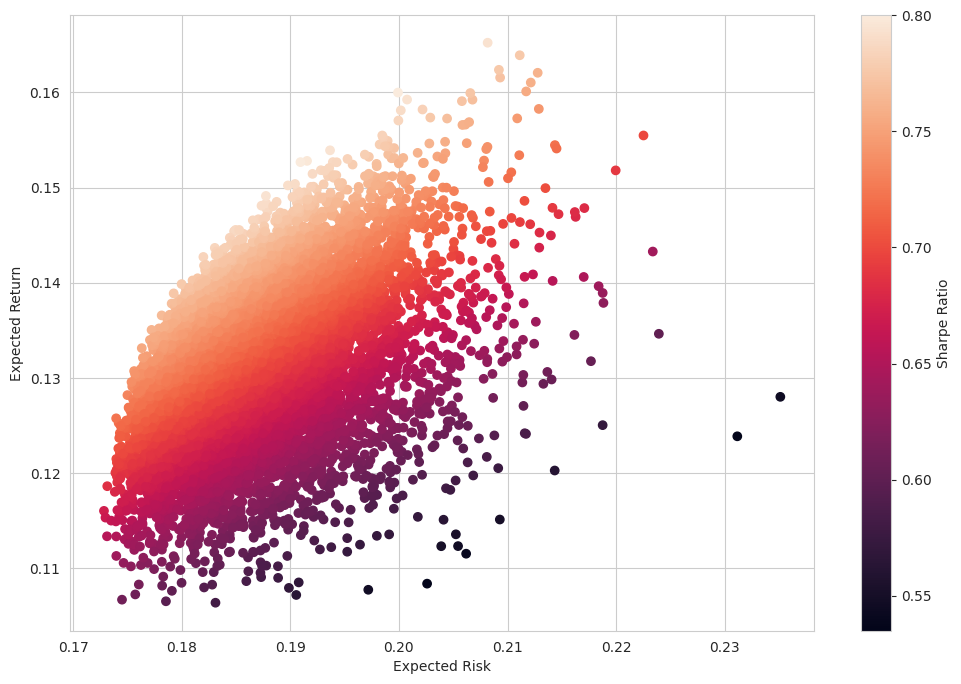

In [17]:
plt.figure(figsize = (12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.show()

In [18]:
sharpe_ratios = portfolio_returns / portfolio_risks

ind = 0

for i in range(len(sharpe_ratios)):
  if sharpe_ratios[i] == np.amax(sharpe_ratios):
    ind = i

In [19]:
sharpe_ratios[ind]

0.8002548592889811

In [20]:
portfolio_returns[ind]

0.15998400354728456